In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer

In [3]:
data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
data['label'] = cancer['target']

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


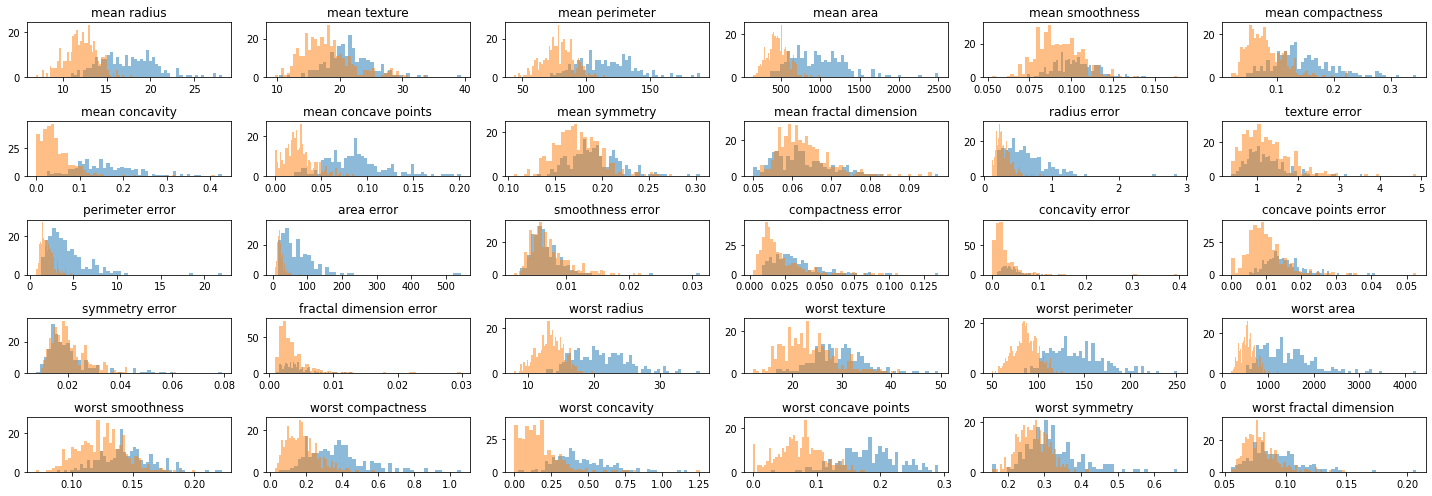

In [12]:
plot_options , charts = plt.subplots(5,6, figsize=(20,7))

malignant = data[data['label'] == 0]
benign = data[data['label'] == 1]

charts_1d = charts.ravel()

for i in range(30):
  charts_1d[i].hist(malignant.iloc[:,i], bins=50, alpha=0.5)
  charts_1d[i].hist(benign.iloc[:,i], bins=50, alpha=0.5)
  charts_1d[i].set_title(data.columns[i])
  plot_options.tight_layout()



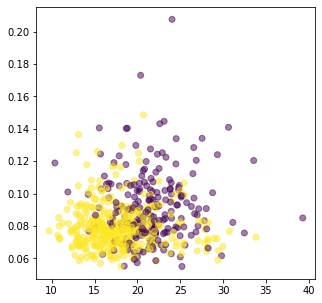

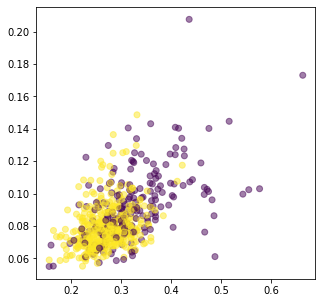

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(data.iloc[:, 1], data.iloc[:,29], c=data['label'], alpha=0.5)
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(data.iloc[:, 28], data.iloc[:,29], c=data['label'], alpha=0.5)
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer['data'])

X_scaled = scaler.transform(cancer['data'])

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)



In [30]:
cancer['data'].shape

(569, 30)

In [31]:
X_pca.shape

(569, 3)

In [32]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611301,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657548,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443046,
         0.23271589,  0.19720728,  0.13032157,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935185,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853138,  0.06454957, -0.00931437,  0.02869945, -0.1042928 ,
        -0.07409175,  0.00273368, -0.02556338, -0

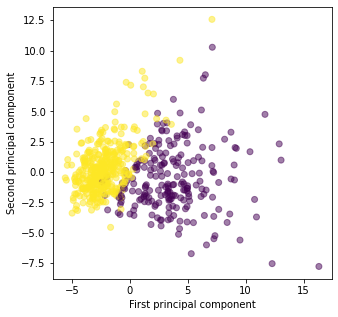

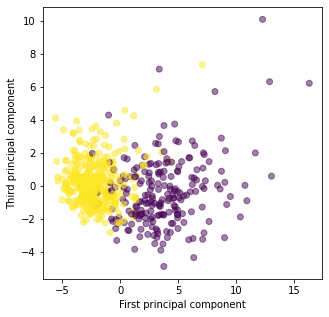

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:, 0], X_pca[:,1], c = data['label'], alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:, 0], X_pca[:,2], c = data['label'], alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Third principal component')
plt.show()

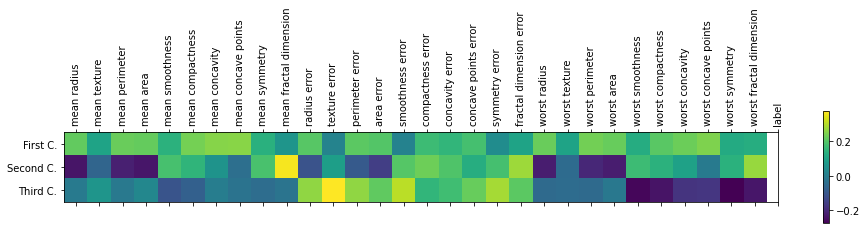

In [34]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1,2], ['First C.', 'Second C.', 'Third C.'])
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.show()

In [ ]:
## mathematically, the new features (principal componets) are a LINEAR COMBINATION
## of the previous (old) features
## the weights of each of them are represented in the diagram above !!

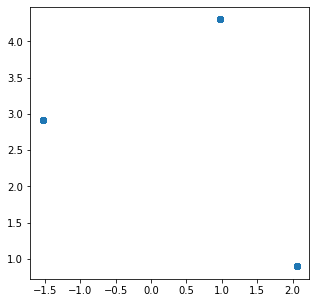

In [80]:
## clustering KNN

from sklearn import cluster, datasets


n_samples = 1500

X, y = datasets.make_blobs(n_samples = n_samples, centers = 3, cluster_std=0, n_features=2, random_state=0)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

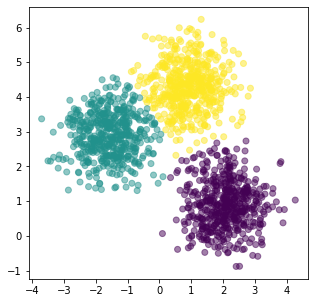

In [44]:
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1] , c=pred, alpha=0.5)
plt.show()

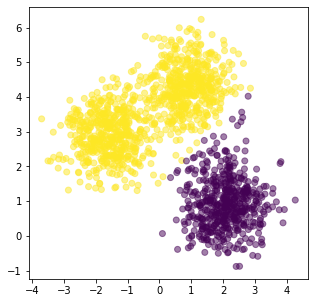

In [45]:
kmeans = cluster.KMeans(n_clusters = 2)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1] , c=pred, alpha=0.5)
plt.show()

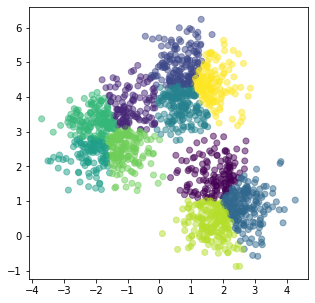

In [47]:
kmeans = cluster.KMeans(n_clusters = 10)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1] , c=pred, alpha=0.5)
plt.show()

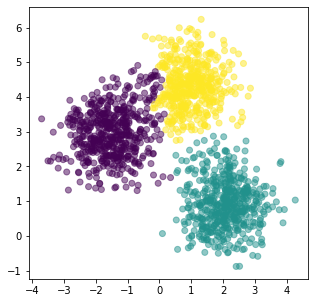

In [49]:
aglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
pred = aglomerative.fit_predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:, 1], c=pred , alpha=0.5)
plt.show()

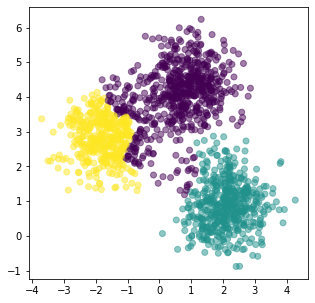

In [50]:
aglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='complete')
pred = aglomerative.fit_predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:, 1], c=pred , alpha=0.5)
plt.show()

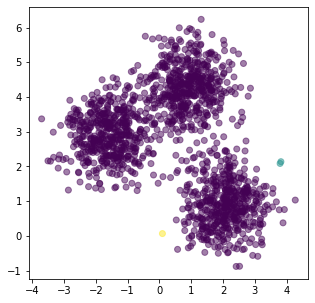

In [51]:
aglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='single')
pred = aglomerative.fit_predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:, 1], c=pred , alpha=0.5)
plt.show()

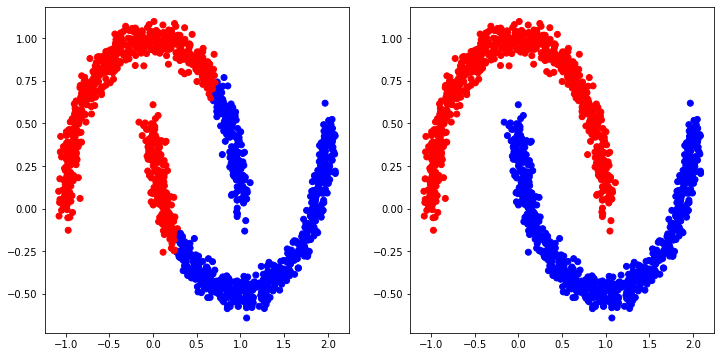

In [63]:
n_samples = 1500

X, y = datasets.make_moons(n_samples = n_samples, noise=0.05)
kmeans = cluster.KMeans(n_clusters =2 )
kmeans.fit(X)

y1_pred = kmeans.predict(X)

single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)


options, charts = plt.subplots(1,2, figsize=(12,6))
colors = np.array(['blue', 'red'])

charts[0].scatter(X[:, 0], X[:,1], color = colors[y1_pred])
charts[1].scatter(X[:, 0], X[:,1], color = colors[y2_pred])
plt.show()

In [79]:
dbs = cluster.DBSCAN(eps=0.03, min_samples = 5)

pred = dbs.fit_predict(X)
pred.max()

76

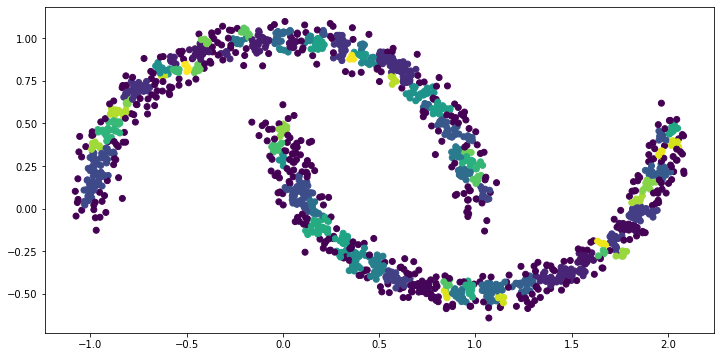

In [78]:
plt.figure(figsize=(12,6))
colors = np.array(['blue', 'red', 'black'])
plt.scatter(X[:,0], X[:,1], c = pred)
plt.show()

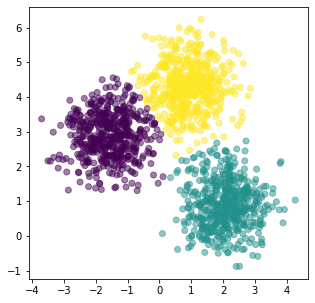

Model 1 Silhouet Score: 0.6056399066187851


In [85]:
from sklearn.metrics import silhouette_score

n_samples = 1500

X, y = datasets.make_blobs(n_samples = n_samples, centers = 3, cluster_std=0.7, n_features=2, random_state=0)

kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1] , c=pred, alpha=0.5)
plt.show()

print("Model 1 Silhouet Score: {}".format(silhouette_score(X, pred)))

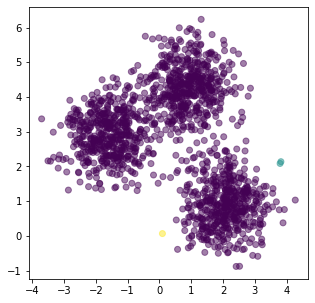

Model 1 Silhouet Score: -0.00722867792759676


In [91]:
aglomerative = cluster.AgglomerativeClustering(n_clusters = 3, linkage ='single')

pred = aglomerative.fit_predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1] , c=pred, alpha=0.5)
plt.show()

print("Model 1 Silhouet Score: {}".format(silhouette_score(X, pred)))

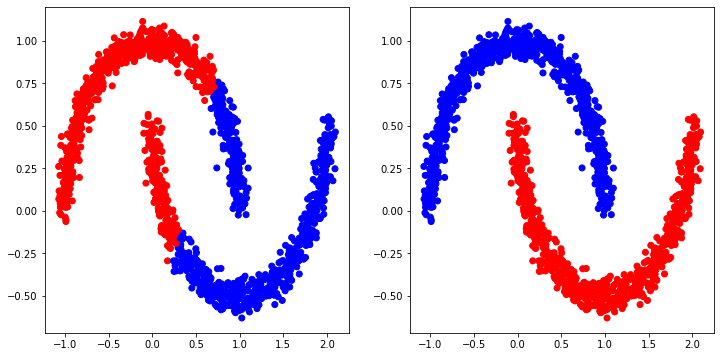

Model 1 Silhouet Score: 0.491435882702386
Model 2 Silhouet Score: 0.3360087132353015


In [99]:
n_samples = 1500

X, y = datasets.make_moons(n_samples = n_samples, noise=0.05, random_state=0)
kmeans = cluster.KMeans(n_clusters =2 )
kmeans.fit(X)

y1_pred = kmeans.predict(X)

single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)


options, charts = plt.subplots(1,2, figsize=(12,6))
colors = np.array(['blue', 'red'])

charts[0].scatter(X[:, 0], X[:,1], color = colors[y1_pred])
charts[1].scatter(X[:, 0], X[:,1], color = colors[y2_pred])
plt.show()

print("Model 1 Silhouet Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouet Score: {}".format(silhouette_score(X, y2_pred)))

In [96]:
import sklearn
sklearn.__version__

'1.0.2'